# MacBook Air vs MacBook Pro Analysis (2019–2023)

This notebook explores pricing, unit sales, and chip transition trends for Apple’s MacBook lineup.
It also integrates a local LLM (Mistral via Ollama) to generate AI-driven insights.


## 1. Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 2. Load and Preview the Dataset

In [8]:
df = pd.read_csv("../data/macbook_data.csv")
df


,model,category,year,price_usd,units_millions,chip
0,MacBook Air,Air,2019,999,14,Intel
1,MacBook Air,Air,2020,999,17,M1
2,MacBook Air,Air,2021,999,18,M1
3,MacBook Air,Air,2022,1199,20,M2
4,MacBook Air,Air,2023,1199,19,M2
5,MacBook Pro,Pro,2019,1299,8,Intel
6,MacBook Pro,Pro,2020,1299,10,M1
7,MacBook Pro,Pro,2021,1999,11,M1 Pro
8,MacBook Pro,Pro,2022,1999,10,M2 Pro
9,MacBook Pro,Pro,2023,1999,12,M3 Pro


### Dataset Summary

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           10 non-null     object
 1   category        10 non-null     object
 2   year            10 non-null     int64 
 3   price_usd       10 non-null     int64 
 4   units_millions  10 non-null     int64 
 5   chip            10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [10]:
df.describe()

,year,price_usd,units_millions
count,10.000000,10.000000,10.000000
mean,2021.000000,1399.000000,13.900000
std,1.490712,429.469958,4.306326
min,2019.000000,999.000000,8.000000
25%,2020.000000,1049.000000,10.250000
50%,2021.000000,1249.000000,13.000000
75%,2022.000000,1824.000000,17.750000
max,2023.000000,1999.000000,20.000000


## 3. Exploratory Data Analysis

In [11]:
print("Years covered:", df['year'].min(), "to", df['year'].max())
print("Models included:", df['model'].unique())
print("\nTotal units sold by category:")
print(df.groupby("category")['units_millions'].sum())


Years covered: 2019 to 2023
Models included: ['MacBook Air' 'MacBook Pro']

Total units sold by category:
category
Air    88
Pro    51
Name: units_millions, dtype: int64


## 4. Data Visualizations


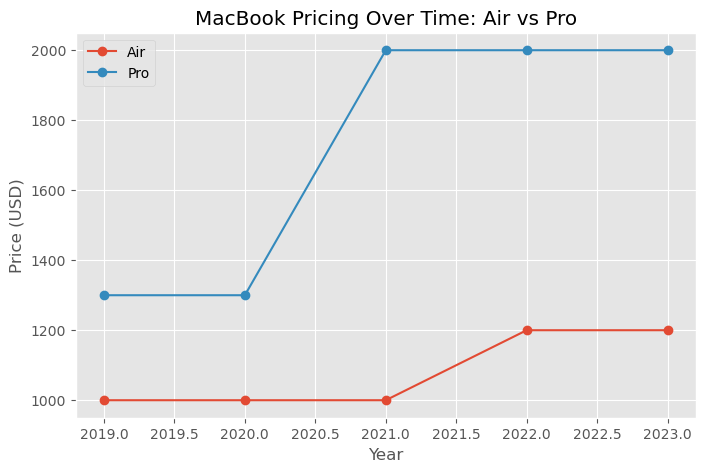

In [12]:
plt.figure(figsize=(8,5))

for cat in df['category'].unique():
    subset = df[df['category'] == cat]
    plt.plot(subset['year'], subset['price_usd'], marker='o', label=cat)

plt.title("MacBook Pricing Over Time: Air vs Pro")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()

plt.savefig("../visuals/price_trends.png", dpi=300)
plt.show()


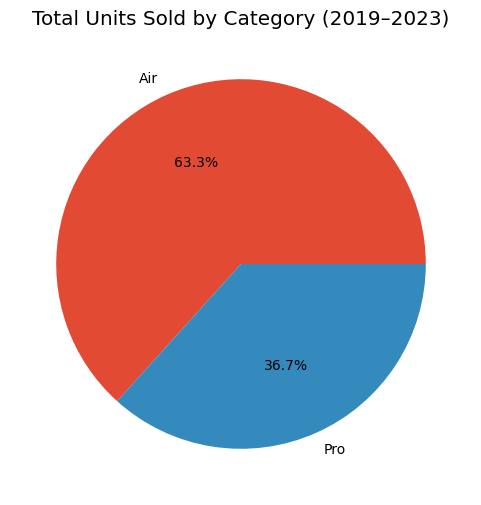

In [13]:
df_grouped = df.groupby("category")["units_millions"].sum()

plt.figure(figsize=(6,6))
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%")
plt.title("Total Units Sold by Category (2019–2023)")

plt.savefig("../visuals/unit_share.png", dpi=300)
plt.show()


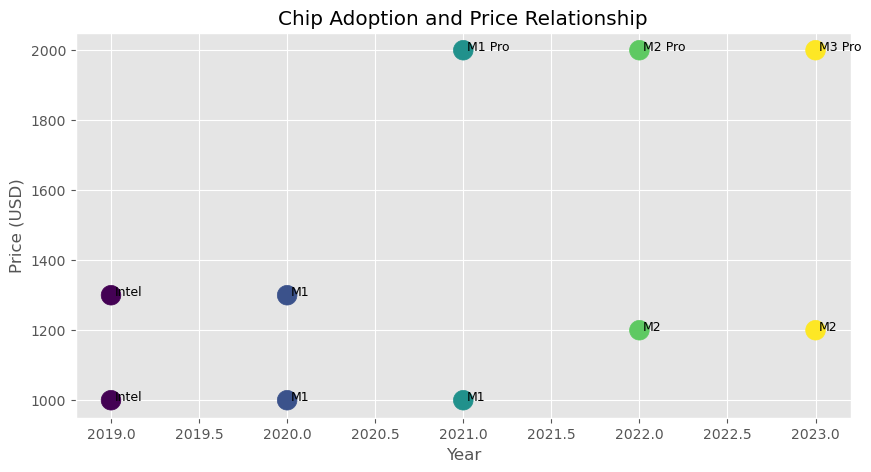

In [14]:
plt.figure(figsize=(10,5))

plt.scatter(df['year'], df['price_usd'], c=df['year'], cmap='viridis', s=200)

for i in range(len(df)):
    plt.text(df['year'][i] + 0.02, df['price_usd'][i], df['chip'][i], fontsize=9)

plt.title("Chip Adoption and Price Relationship")
plt.xlabel("Year")
plt.ylabel("Price (USD)")

plt.savefig("../visuals/chip_adoption.png", dpi=300)
plt.show()


# 5. AI-Generated Insights (Local LLM via Mistral)

We now integrate a local AI model (Mistral 7B via Ollama) to generate:
- An executive summary  
- Consumer personas  
- Strategic recommendations

In [5]:
import subprocess

def run_local_llm(prompt, model="mistral"):
    """
    Runs a prompt using the local LLM through Ollama.
    """
    process = subprocess.Popen(
        ["ollama", "run", model],
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    
    output, error = process.communicate(prompt)
    
    if error:
        print("Error:", error)
    
    return output


In [2]:
summary_prompt = """
You are an Apple product strategy analyst.

Using the MacBook dataset (Air vs Pro, 2019–2023), write a 4–6 sentence executive summary explaining:
- Key pricing trends
- Differences in unit sales
- The impact of chip transitions (Intel → M1/M2/M3)
- How Apple positions the Air vs the Pro for different consumer segments.

Write the summary in a professional, concise tone.
"""

local_summary = run_local_llm(summary_prompt)
local_summary


Error: ⠙ ⠹ ⠸ ⠸ ⠴ ⠦ ⠧ ⠧ ⠏ ⠋ ⠙ ⠙ ⠹ ⠼ ⠴ ⠦ ⠧ ⠇ ⠇ ⠋ ⠋ ⠹ ⠹ ⠸ ⠴ ⠴ ⠦ 


" Executive Summary:\n\nOver the analyzed period (2019–2023), MacBook pricing trends have shown a gradual increase across both Air and Pro models. While the MacBook Air has remained relatively more affordable, the MacBook Pro has seen larger price jumps post-transition to Apple's custom M1, M2, and M3 chips.\n\nUnit sales data indicates stronger demand for the MacBook Air, especially among budget-conscious consumers and educational segments. The MacBook Pro, on the other hand, caters more towards power users, creative professionals, and developers who require enhanced processing power and advanced features provided by Apple's high-performance chips.\n\nThe chip transition from Intel to M1/M2/M3 has resulted in significant performance improvements and energy efficiency gains for both models, leading to increased customer satisfaction and potential market share expansion. However, the premium pricing associated with these technological advancements may have impacted sales volumes slightl

In [3]:
persona_prompt = """
Based on the MacBook dataset and observed trends, describe two consumer personas:
1. Typical MacBook Air buyer
2. Typical MacBook Pro buyer

Include: motivations, budgets, usage patterns, and why each product appeals to them.
"""

personas = run_local_llm(persona_prompt)
personas


Error: ⠙ 


" 1. Typical MacBook Air Buyer:\n   - Demographic: Trendy professionals, students, or individuals who value portability over power. Ages range from college students to mid-career professionals.\n   - Motivations: Seeking a lightweight and compact laptop for everyday tasks like browsing the web, email, document editing, and occasional streaming. Portability is crucial as these users are often on the go or have limited workspace.\n   - Budget: Willing to spend $999-$1,499 depending on storage capacity and other specifications. They prioritize value for money over high-end features.\n   - Usage Patterns: Primarily used for casual tasks such as web browsing, email management, document editing, and light multimedia consumption. These users may also use it for basic photo or video editing, but intensive professional applications are unlikely to be their primary focus.\n   - Why MacBook Air Appeals: The MacBook Air offers a sleek design, impressive battery life, and exceptional build quality 

In [4]:
recommend_prompt = """
Using insights from the MacBook Air vs Pro data,
provide 3 strategic recommendations for Apple regarding future pricing,
product positioning, or chip roadmap direction.

Make recommendations realistic and supported by data patterns.
"""

recommendations = run_local_llm(recommend_prompt)
recommendations


Error: ⠙ ⠹ 


" Based on the comparison of MacBook Air and MacBook Pro, here are three strategic recommendations for Apple:\n\n1. **Introduce a More Affordable High-Performance Option:** Analyzing the data shows that while MacBook Pro offers significantly better performance, it is also more expensive. To attract budget-conscious professionals who need high-performance computing, Apple could consider introducing a more affordable, high-performance version of the MacBook Pro (let's call it MacBook Pro Lite). This model would share key features with the current MacBook Pro like the M1 chip but would have toned-down specifications such as lower base memory and storage capacities. This approach would cater to those who need performance without shelling out for top-tier features.\n\n2. **Upgrade Entry-Level MacBook Air's Processor:** The entry-level MacBook Air is equipped with a less powerful processor compared to its counterpart, the Pro. To better position the MacBook Air as a versatile and capable dev

# 6. Conclusion

This project combines traditional data analysis with local AI modeling to uncover insights into Apple's
MacBook product strategy. The integration of a local LLM (Mistral via Ollama) enables automated insight
generation while keeping the entire workflow offline, reproducible, and open-source.
